In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [6]:
bank = pd.read_csv("/content/sample_data/bank.csv")
bank.rename(columns={'y':'deposit'},inplace=True)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
bank.shape

(11162, 17)

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
bank.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


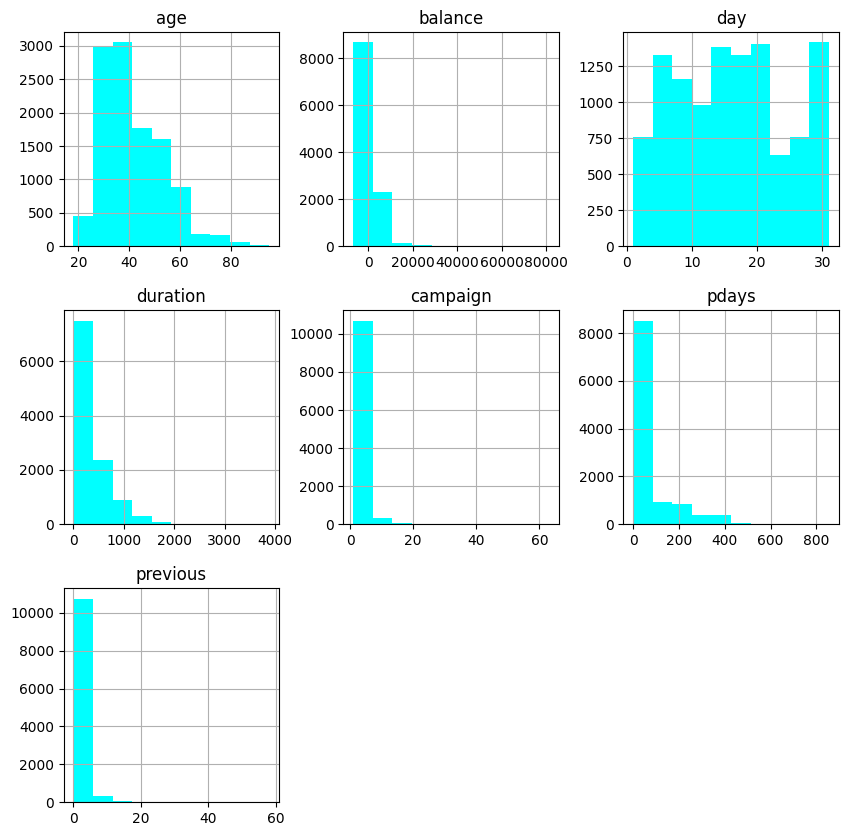

In [8]:
bank.hist(figsize=(10,10),color='#00FFFF')
plt.show()

<ipython-input-17-30ce9b68cb8c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=features, data=bank,palette='bwr')


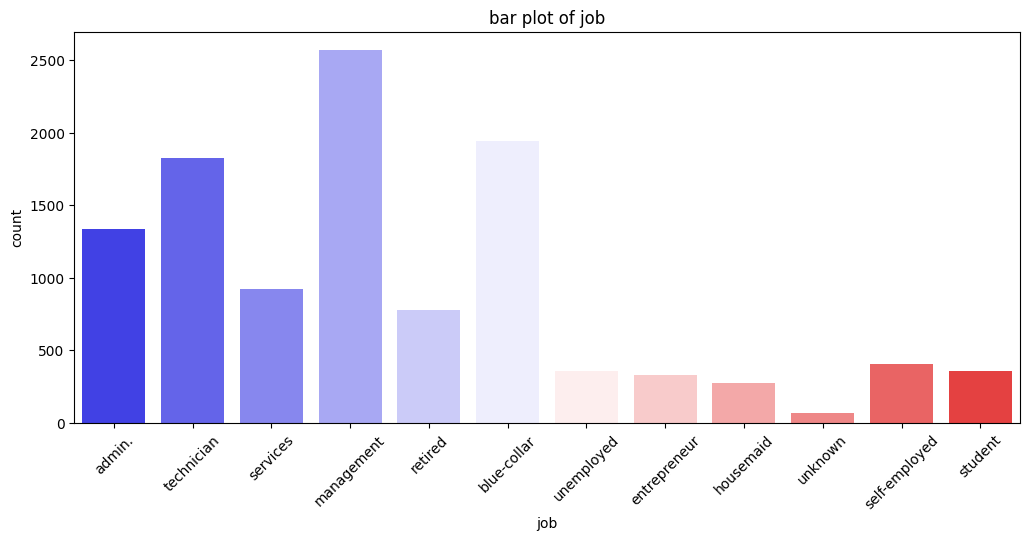

<ipython-input-17-30ce9b68cb8c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=features, data=bank,palette='bwr')


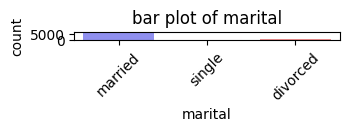

<ipython-input-17-30ce9b68cb8c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=features, data=bank,palette='bwr')


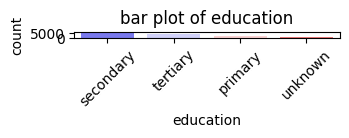

<ipython-input-17-30ce9b68cb8c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=features, data=bank,palette='bwr')


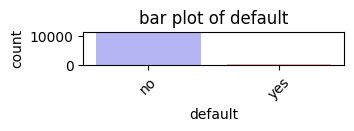

<ipython-input-17-30ce9b68cb8c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=features, data=bank,palette='bwr')


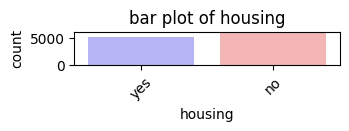

<ipython-input-17-30ce9b68cb8c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=features, data=bank,palette='bwr')


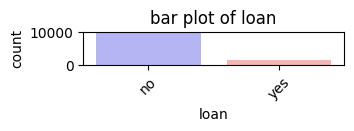

<ipython-input-17-30ce9b68cb8c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=features, data=bank,palette='bwr')


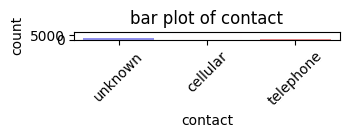

<ipython-input-17-30ce9b68cb8c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=features, data=bank,palette='bwr')


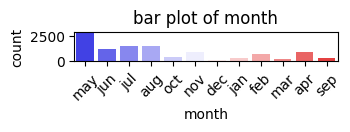

<ipython-input-17-30ce9b68cb8c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=features, data=bank,palette='bwr')


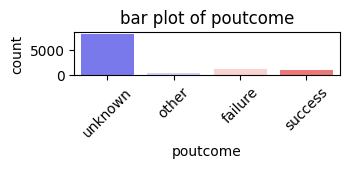

<ipython-input-17-30ce9b68cb8c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=features, data=bank,palette='bwr')


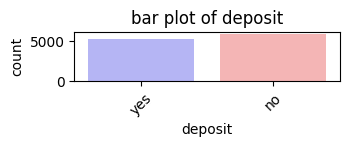

In [17]:
#calculate the number of riws and columns for subplots
cat_cols = bank.select_dtypes(include=['object']).columns # Define cat_cols here
num_plots = len(cat_cols)
num_rows =(num_plots+1)//2
num_cols = 2
#create a new figure
plt.figure(figsize=(20, 25)) #Adjust the figure size as needed

#loop through each features and create a countplot
for i,features in enumerate(cat_cols,1):
  plt.subplot(num_rows, num_cols, i) # Corrected 'sublpot' to 'subplot'
  sns.countplot(x=features, data=bank,palette='bwr')
  plt.title(f'bar plot of {features}') # Changed 'feature' to 'features'
  plt.xlabel(features) # Changed 'feature' to 'features'
  plt.ylabel('count')
  plt.xticks(rotation=45)

  #Adjust layout to prevent overlap of subplots
  plt.tight_layout()
  plt.show()

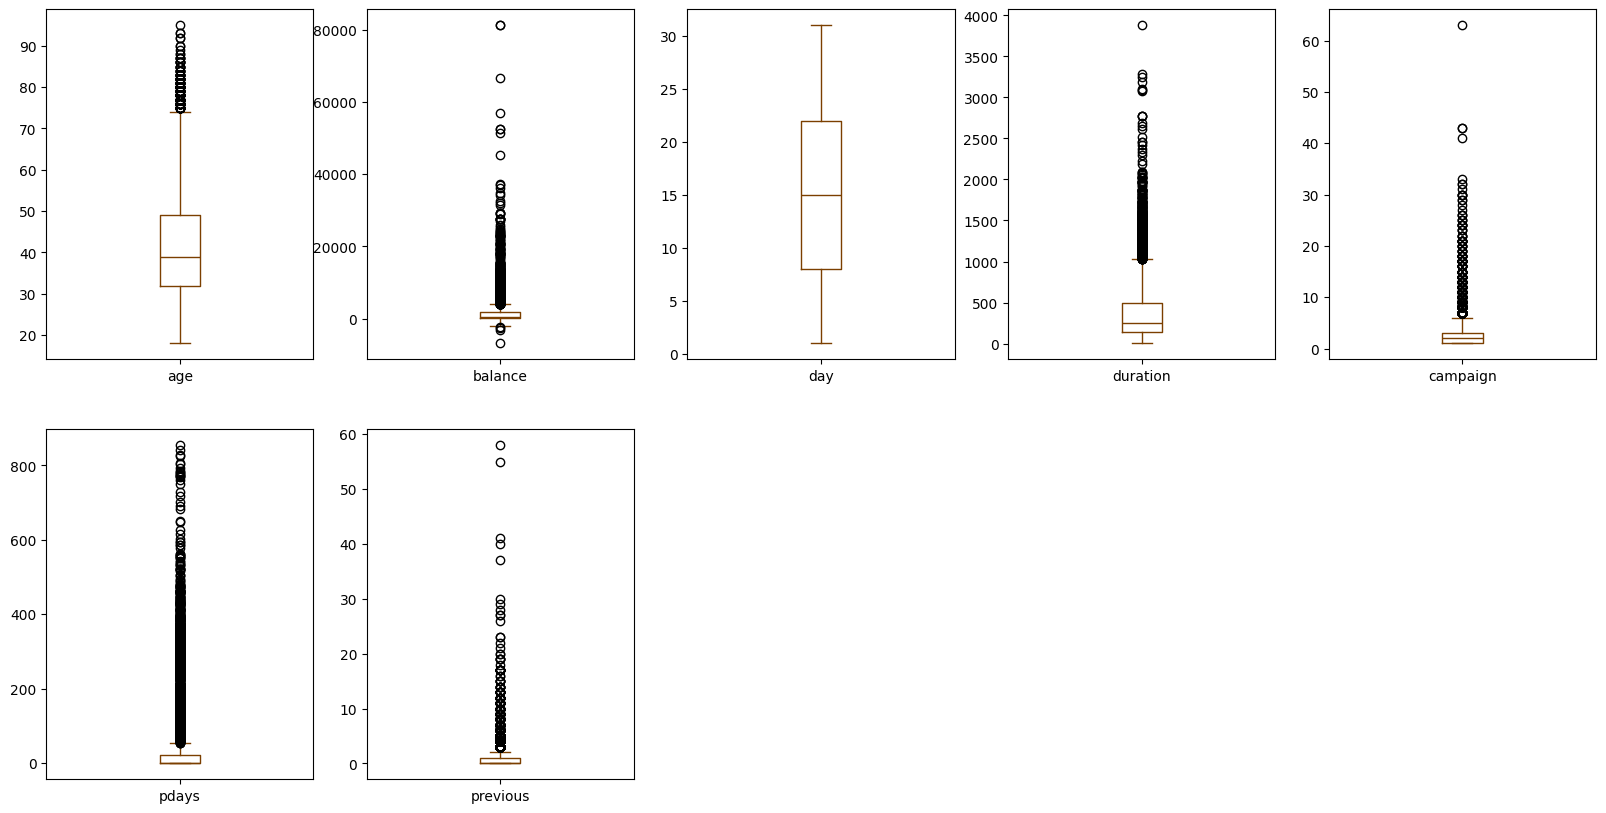

In [19]:
bank.plot(kind='box', subplots=True, layout=(2, 5), figsize=(20, 10), color='#7b3f00')
plt.show()

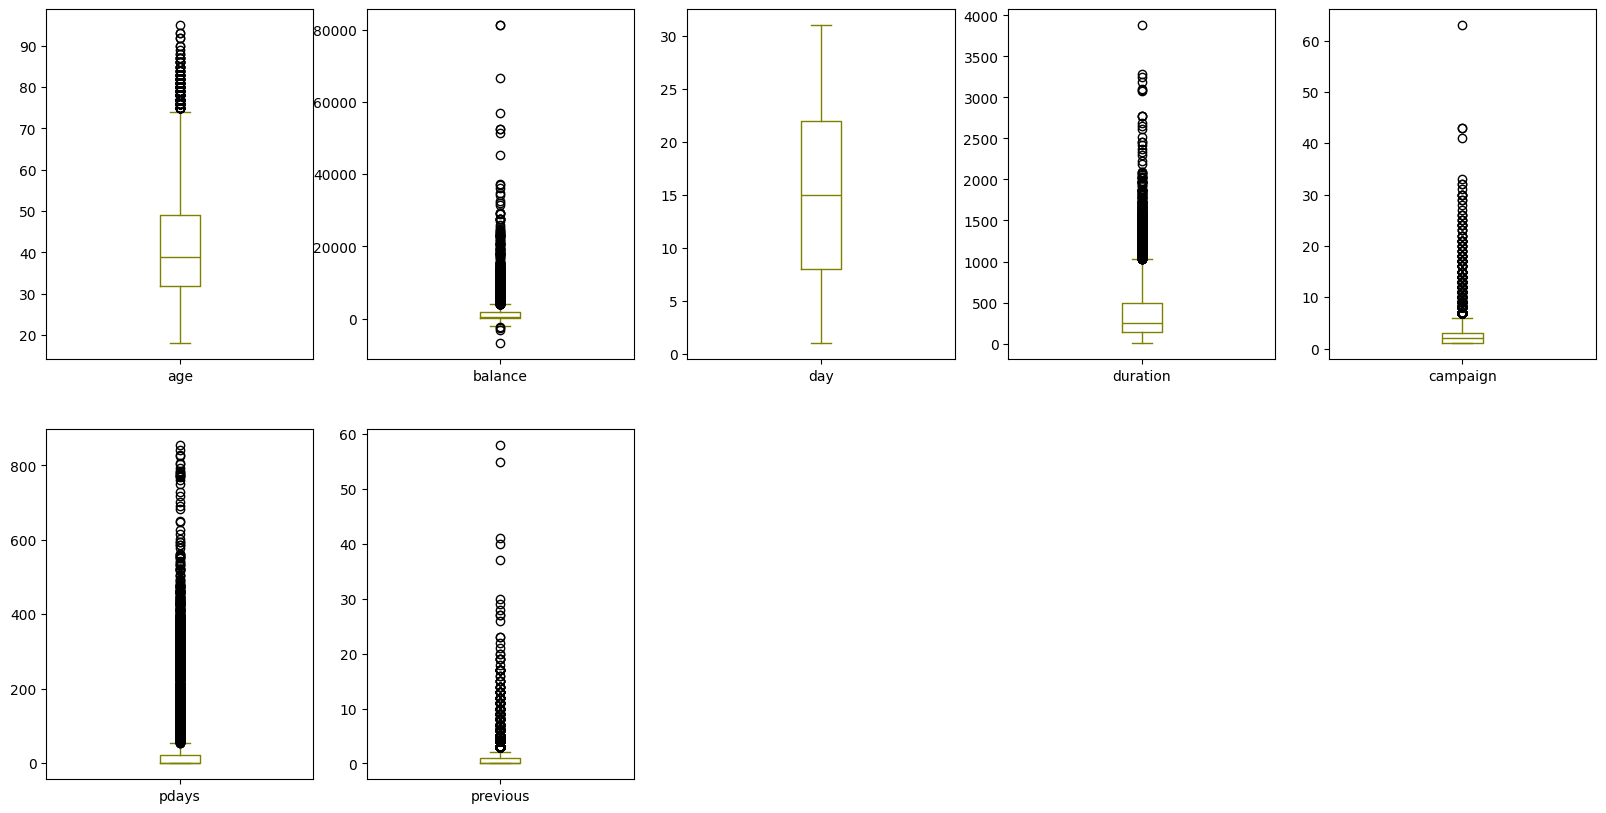

In [20]:
bank.plot(kind='box', subplots=True, layout=(2, 5), figsize=(20, 10), color='#808000')
plt.show()

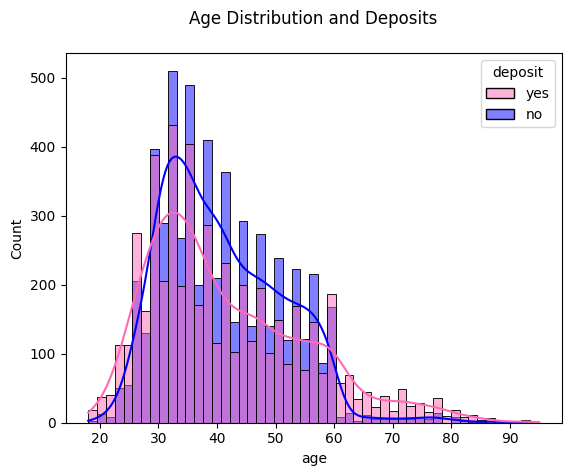

In [ ]:
sns.histplot(x="age", data=bank, kde=True, hue="deposit", palette=["hotpink", "blue"])
plt.title("Age Distribution and Deposits\n")
plt.show()

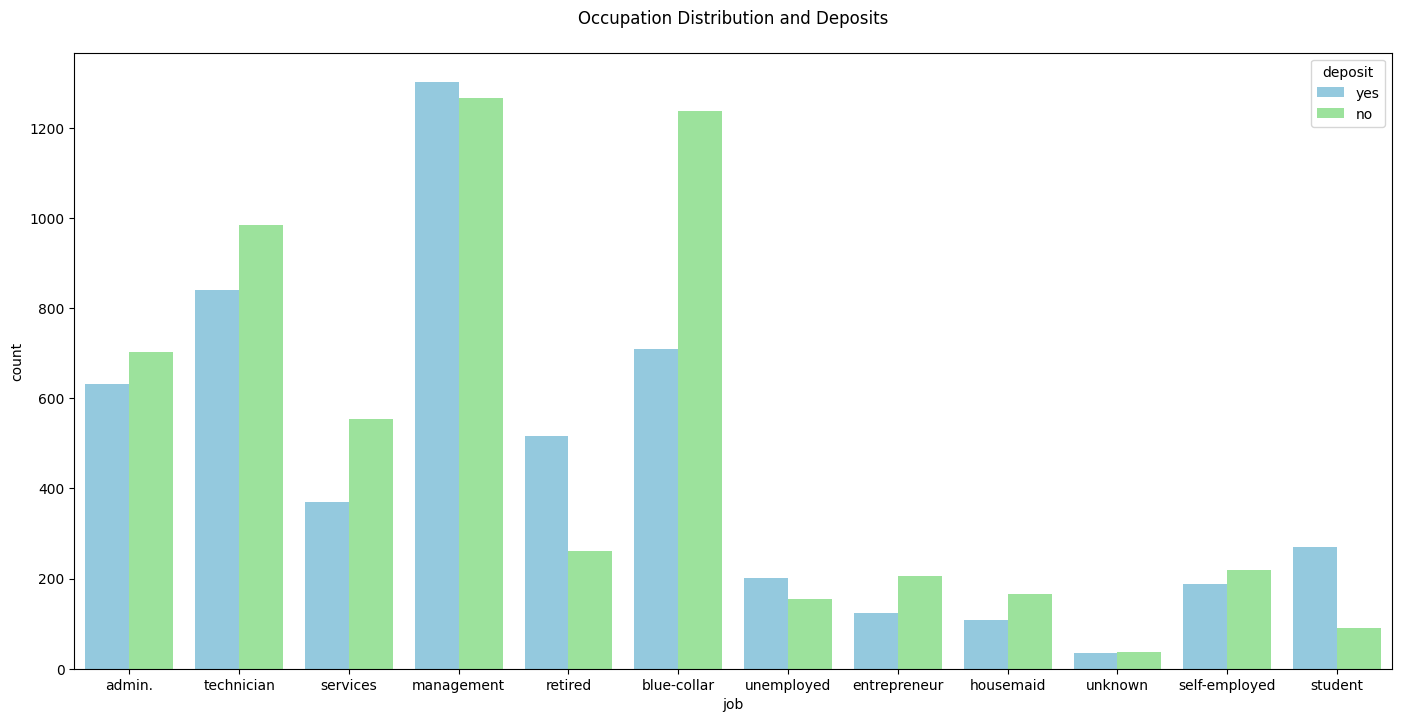

In [ ]:
plt.figure(figsize=(17,8))
sns.countplot(x="job", data=bank, hue="deposit", palette=["skyblue","lightgreen"]) # Change 'y' to 'deposit'
plt.title("Occupation Distribution and Deposits\n")
plt.show()

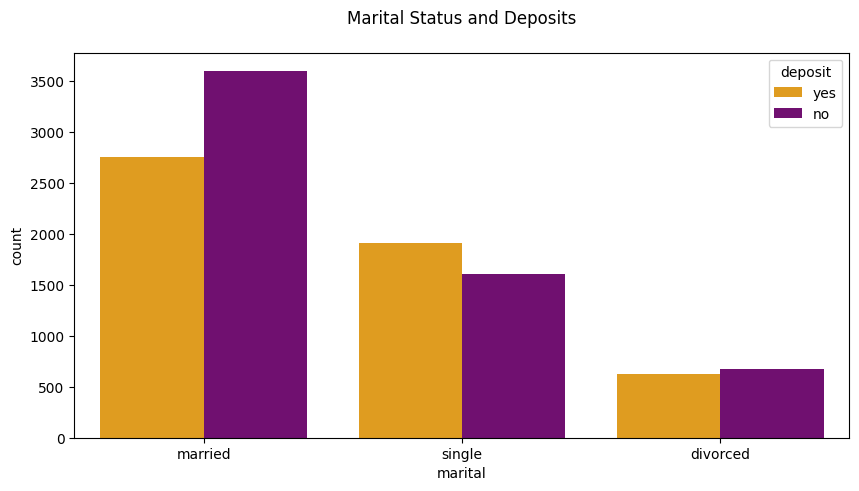

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="marital", data= bank, hue ="deposit", palette = ["orange","purple"]) # Change 'y' to 'deposit'
plt.title("Marital Status and Deposits\n")
plt.show()

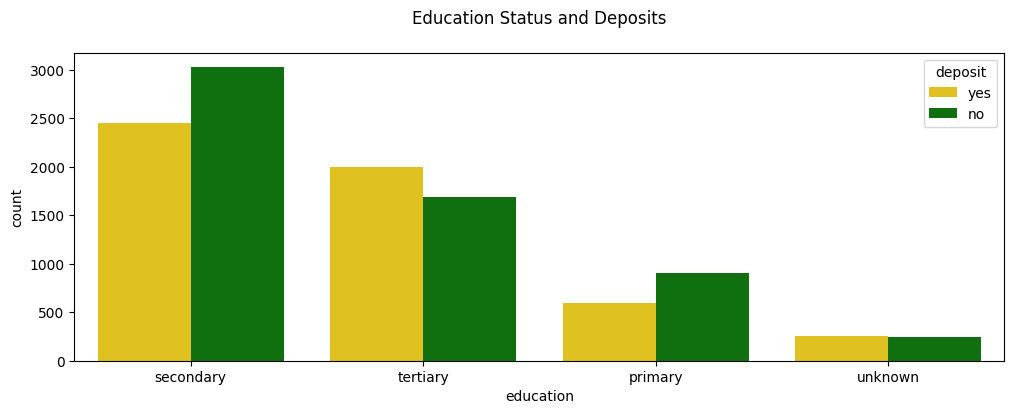

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x="education", data= bank, hue ="deposit", palette = ["gold","green"]) # Changed 'y' to 'deposit'
plt.title("Education Status and Deposits\n")
plt.show()

In [ ]:
bank.default.value_counts()

,count
default,
no,10994
yes,168


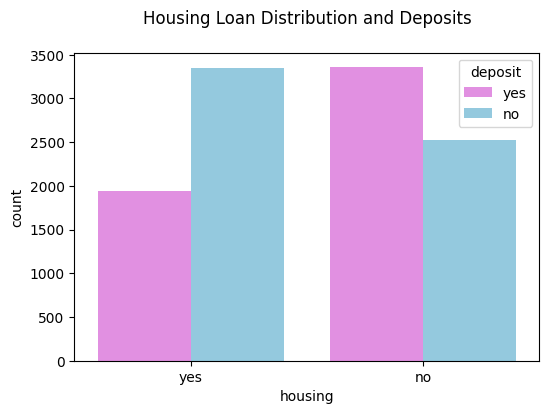

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="housing", data=bank, hue="deposit", palette=["violet","skyblue"]) # Change 'y' to 'deposit'
plt.title("Housing Loan Distribution and Deposits\n")
plt.show()


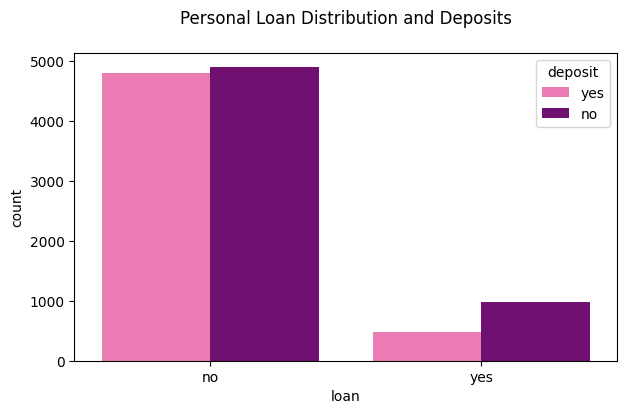

In [ ]:
plt.figure(figsize=(7,4))
sns.countplot(x="loan", data= bank, hue ="deposit", palette = ["hotpink","purple"]) # Changed 'y' to 'deposit'
plt.title("Personal Loan Distribution and Deposits\n")
plt.show()

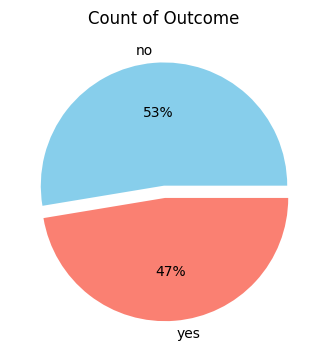

In [ ]:
# Count of Outcome
counts = bank['deposit'].value_counts() # Change 'y' to 'deposit'
keys = counts.index
data = counts.values

# Custom colors for the pie chart
colors = ['skyblue', 'salmon']

# Create the pie chart with custom colors
plt.figure(figsize=(8, 4))
explode = [0, 0.1]
plt.pie(data, labels=keys, explode=explode, autopct='%.0f%%', colors=colors)

# Add title
plt.title('Count of Outcome')

# Show the plot
plt.show()

In [ ]:
cols = bank.select_dtypes("object").columns
cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
le = LabelEncoder()

bank[cols] = bank[cols].apply(le.fit_transform)
bank.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


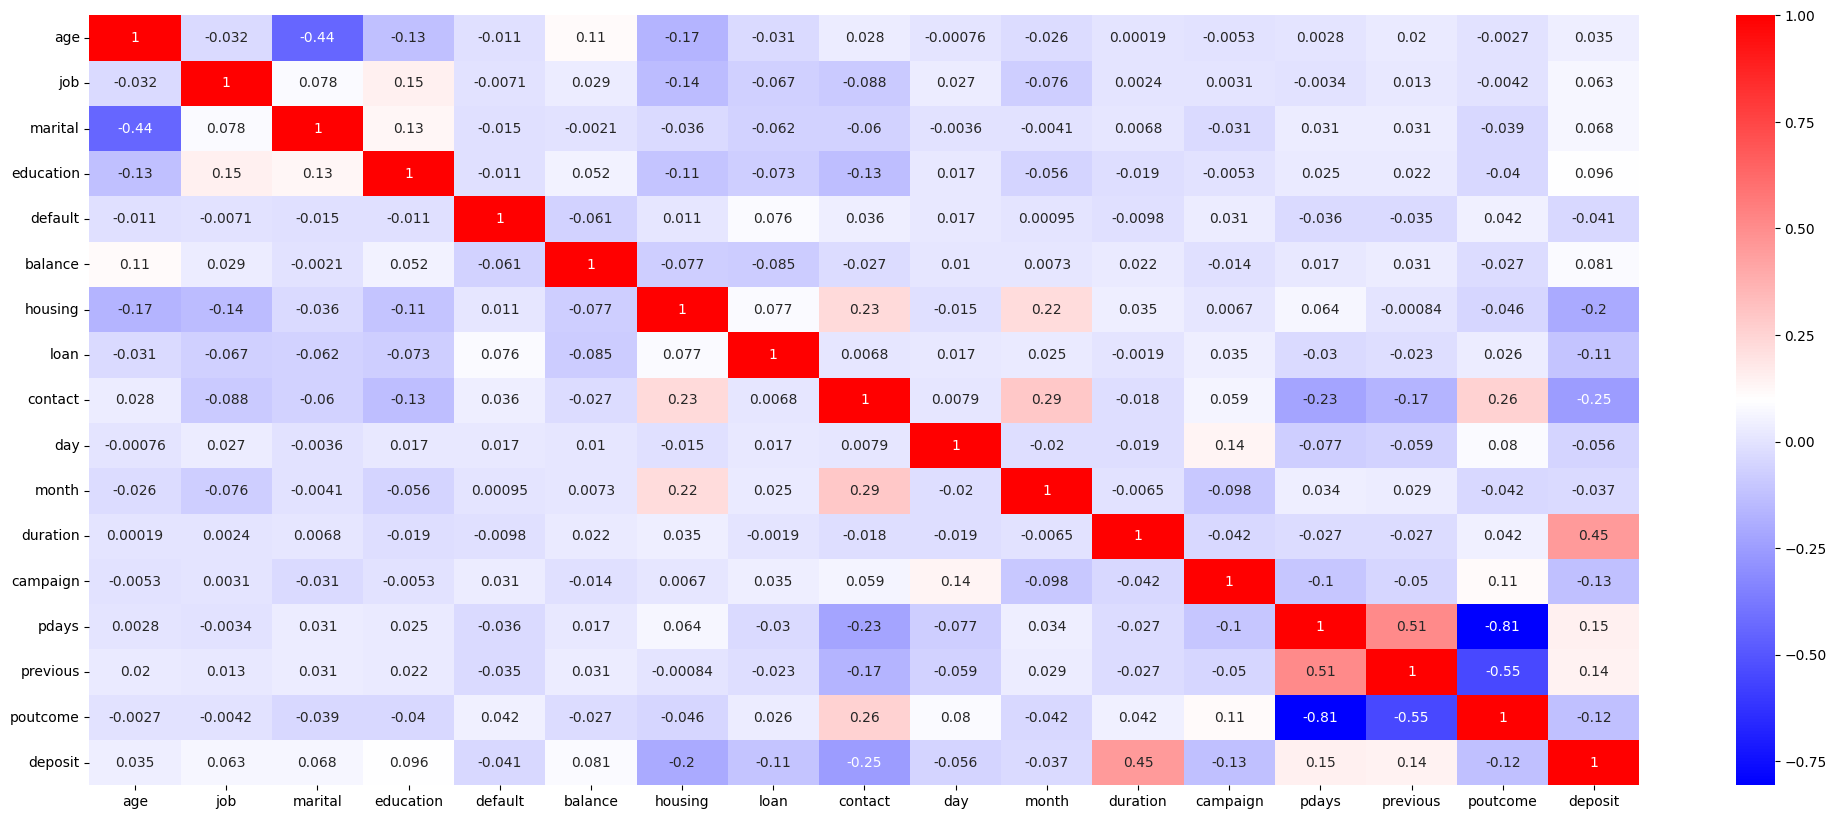

In [ ]:
plt.figure(figsize=(25,10))
sns.heatmap(bank.corr(), cmap='bwr', annot=True)
plt.show()

In [ ]:
#Splitting input and output
X = bank.drop("deposit", axis=1)
y = bank.deposit

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the features
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Describe the scaled features
description = X_scaled.describe()
print(description)

                age           job       marital     education       default  \
count  1.116200e+04  1.116200e+04  1.116200e+04  1.116200e+04  1.116200e+04   
mean   2.749995e-16  4.074067e-17  6.874988e-17 -6.620359e-17  4.074067e-17   
std    1.000045e+00  1.000045e+00  1.000045e+00  1.000045e+00  1.000045e+00   
min   -1.950161e+00 -1.391604e+00 -1.917331e+00 -1.714823e+00 -1.236166e-01   
25%   -7.749580e-01 -1.081525e+00 -3.186719e-01 -3.805006e-01 -1.236166e-01   
50%   -1.873565e-01 -1.512891e-01 -3.186719e-01 -3.805006e-01 -1.236166e-01   
75%    6.520742e-01  7.789471e-01  1.279987e+00  9.538215e-01 -1.236166e-01   
max    4.513455e+00  2.019262e+00  1.279987e+00  2.288144e+00  8.089529e+00   

            balance       housing          loan       contact           day  \
count  1.116200e+04  1.116200e+04  1.116200e+04  1.116200e+04  1.116200e+04   
mean   1.018517e-17 -1.018517e-16 -5.092584e-18  1.018517e-16 -2.037033e-17   
std    1.000045e+00  1.000045e+00  1.000045e+00  1.

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.3)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)

DecisionTreeClassifier()

In [ ]:
print('Train Score: {}'.format(decision_tree.score(train_X, train_y)))
print('Test Score: {}'.format(decision_tree.score(test_X, test_y)))

Train Score: 1.0
Test Score: 0.7930725589728277


In [ ]:
cross_val_score(decision_tree, train_X, train_y, cv=5).mean()

0.7783178217797448

In [ ]:
ypred = decision_tree.predict(test_X)
print(classification_report(test_y,ypred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1774
           1       0.78      0.79      0.78      1575

    accuracy                           0.79      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.79      0.79      0.79      3349



In [ ]:
param_grid = {
    'max_depth': [3, 5, 7,10, None],
    'criterion' : ['gini', 'entropy'],
    'min_samples_leaf': [3, 5, 7, 9,10,20]
    }

gscv = GridSearchCV(decision_tree, param_grid, cv=5, verbose=1)
gscv.fit(train_X, train_y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [3, 5, 7, 9, 10, 20]},
             verbose=1)

In [ ]:
clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, min_samples_leaf = 3)
clf.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)

In [ ]:
print('Train Score: {}'.format(clf.score(train_X, train_y)))
print('Test Score: {}'.format(clf.score(test_X, test_y)))

Train Score: 0.7979009343402023
Test Score: 0.7817258883248731


In [ ]:
pred_y = clf.predict(test_X)

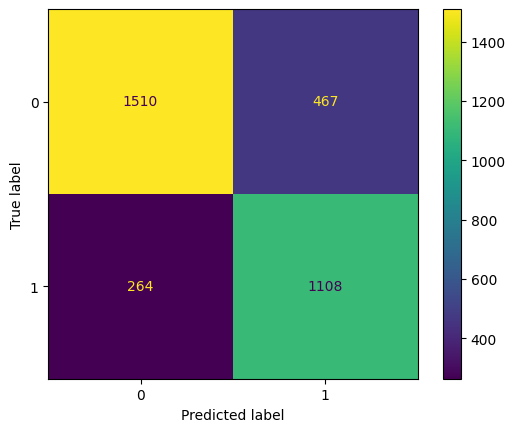

In [ ]:
cm = confusion_matrix(pred_y, test_y)
ConfusionMatrixDisplay(cm, display_labels=clf.classes_).plot()
plt.show()

In [ ]:
print(classification_report(pred_y, test_y))

              precision    recall  f1-score   support

           0       0.85      0.76      0.81      1977
           1       0.70      0.81      0.75      1372

    accuracy                           0.78      3349
   macro avg       0.78      0.79      0.78      3349
weighted avg       0.79      0.78      0.78      3349



In [ ]:
accuracy = accuracy_score(test_y,pred_y)
print("Test Accuracy of Decision Tree Classifier : {}".format(accuracy*100))

Test Accuracy of Decision Tree Classifier : 78.1725888324873


In [ ]:
Cross_val = cross_val_score(clf, test_X,test_y, cv=5).mean()
print("Cross-Validation Accuracy Scores Decision Tree : ",Cross_val*100)

Cross-Validation Accuracy Scores Decision Tree :  79.72536421033844


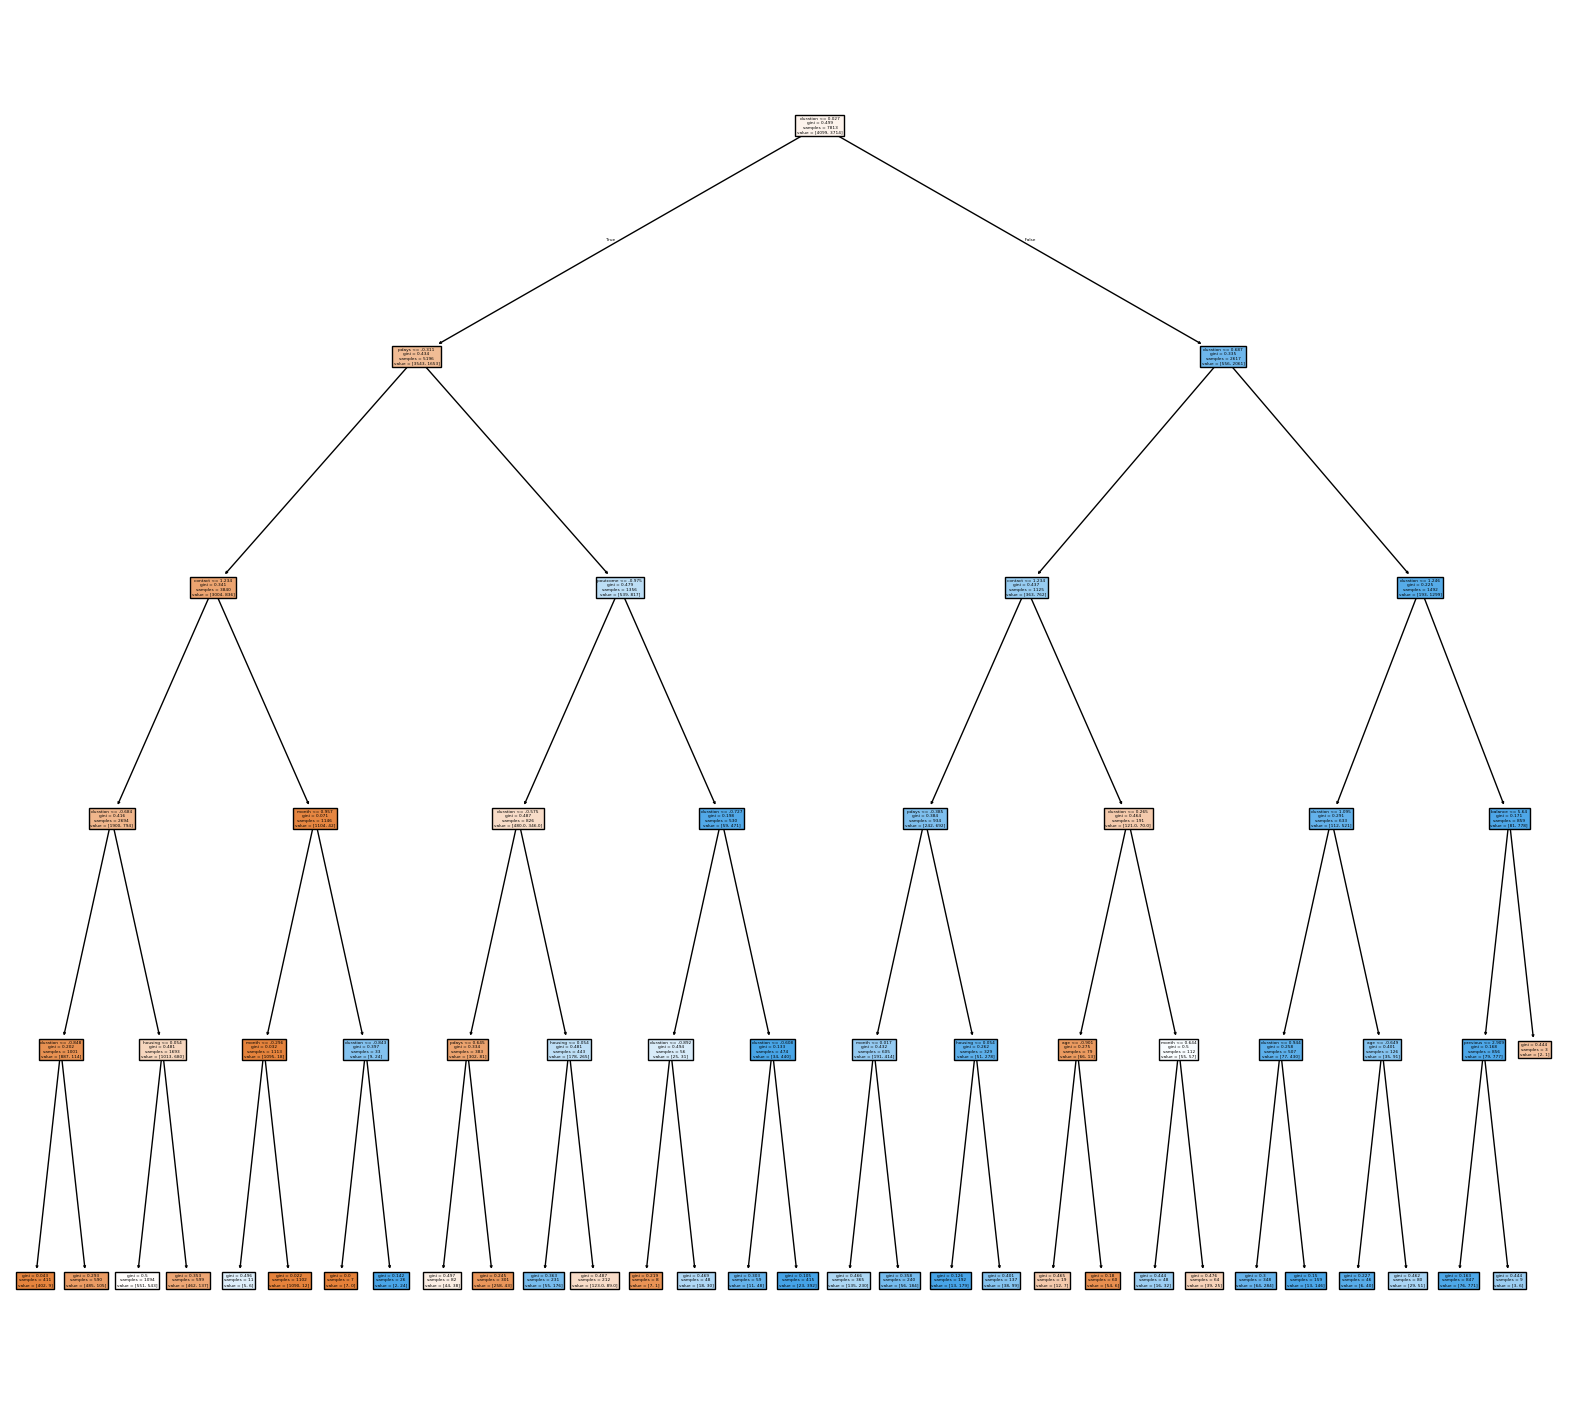

In [ ]:
from sklearn import tree

# Convert the Index object to a list
feature_names = list(X.columns)

# Plot the decision tree
fig = plt.figure(figsize=(20, 18))
t = tree.plot_tree(clf, filled=True, feature_names=feature_names)

# Show the plot
plt.show()